In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.linear_model import LinearRegression
import math


In [3]:
clima = pd.read_csv(r'C:\Users\RAUL GLEZ\Desktop\Data Analyst\Módulo 5\BicycleWeather.csv', index_col='DATE',parse_dates=True)
contador = pd.read_csv(r'C:\Users\RAUL GLEZ\Desktop\Data Analyst\Módulo 5\Fremont_Bridge_Bicycle_Counter.csv', index_col='Date',parse_dates=True)

In [4]:
clima

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT04,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",15.21,NaN,NaN,0.05,0.0,0.0,41.0,44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-28,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.72,NaN,NaN,0.00,0.0,0.0,41.0,47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-29,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.50,NaN,NaN,0.05,0.0,0.0,42.0,48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
contador

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2022-08-01 00:00:00,23.0,7.0,16.0
2022-08-01 01:00:00,12.0,5.0,7.0
2022-08-01 02:00:00,3.0,0.0,3.0
2022-08-01 03:00:00,5.0,2.0,3.0
2022-08-01 04:00:00,10.0,2.0,8.0
...,...,...,...
2022-09-30 19:00:00,168.0,57.0,111.0
2022-09-30 20:00:00,73.0,33.0,40.0
2022-09-30 21:00:00,69.0,30.0,39.0


In [6]:
clima.isnull().sum()

STATION       0
NAME          0
AWND          0
FMTM       1796
PGTM       1827
PRCP          0
SNOW          0
SNWD          0
TAVG        456
TMAX          0
TMIN          0
WDF2          0
WDF5         23
WSF2          0
WSF5         23
WT01       1061
WT02       1734
WT03       1808
WT04       1822
WT05       1824
WT08       1792
WT09       1827
WT13       1632
WT14       1774
WT16       1559
WT17       1826
WT18       1807
WT22       1818
dtype: int64

In [7]:
contador.isnull().sum()

Fremont Bridge Total            14
Fremont Bridge East Sidewalk    14
Fremont Bridge West Sidewalk    14
dtype: int64

<AxesSubplot: >

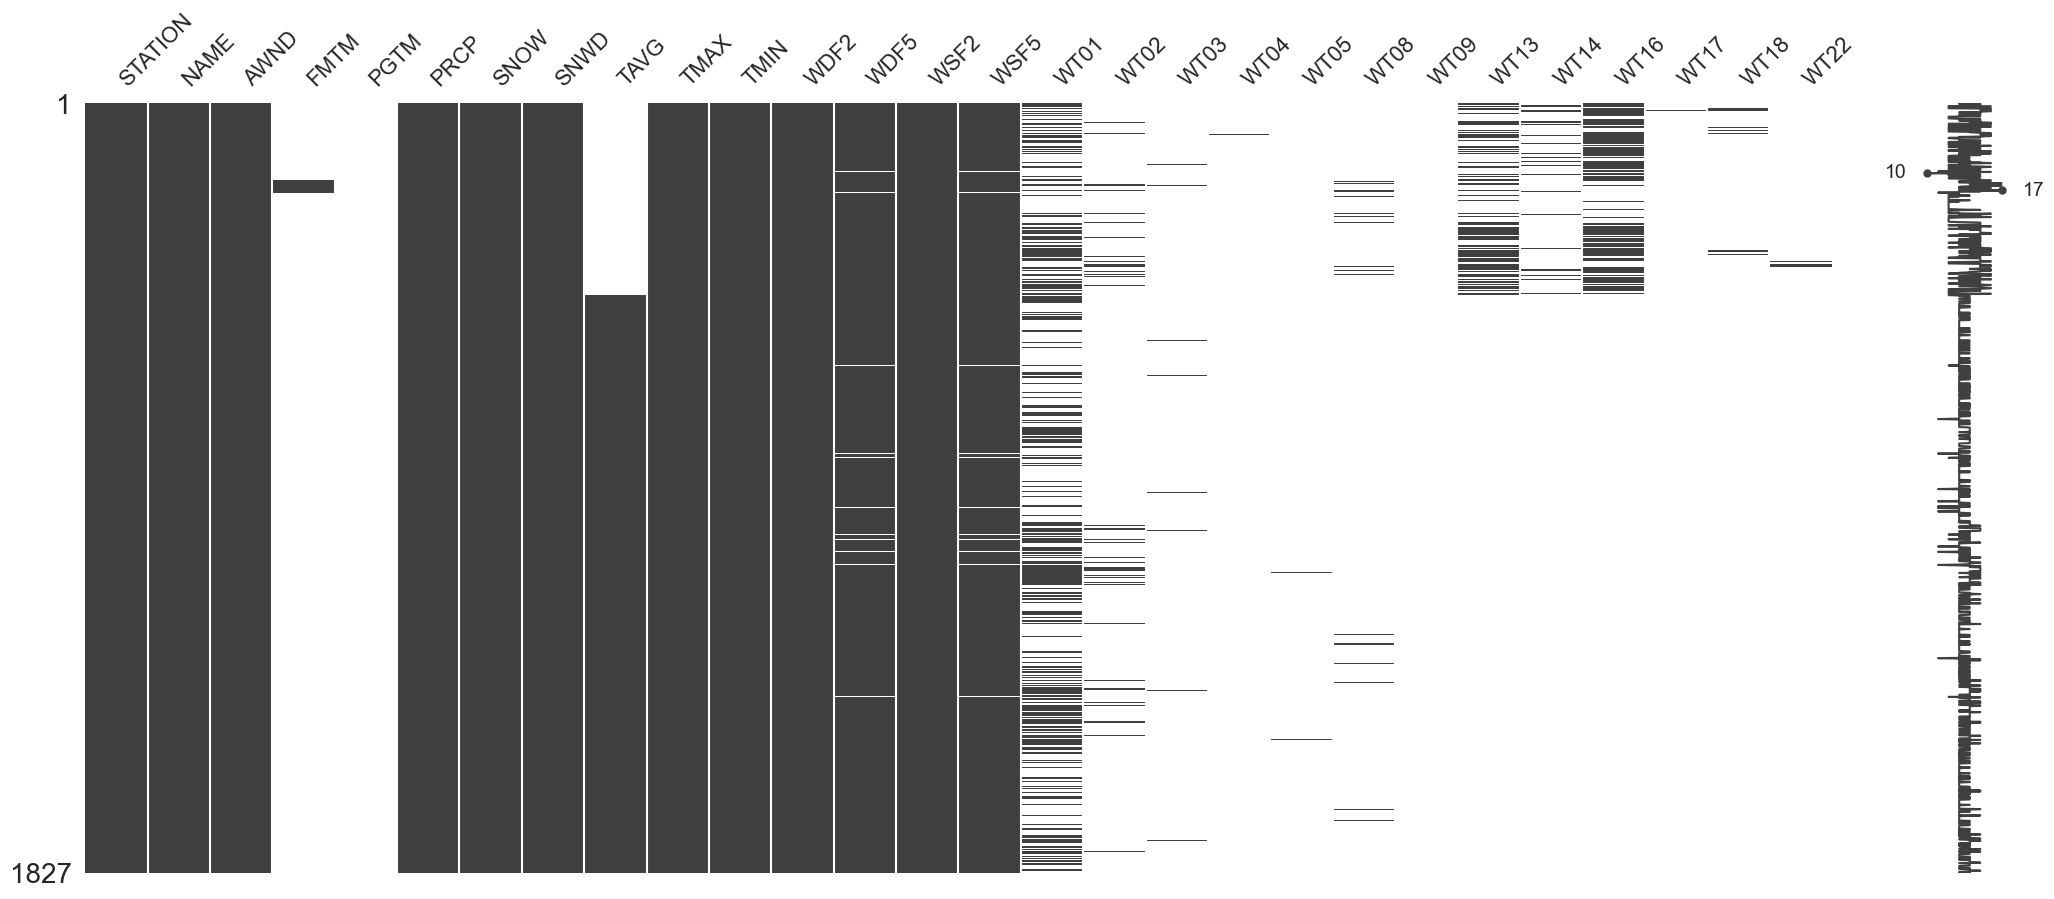

In [8]:
msno.matrix(clima)

In [9]:
daily = contador.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']]


In [10]:
daily

,Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0
...,...
2022-09-26,6374.0
2022-09-27,7344.0
2022-09-28,5812.0


In [11]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [12]:
days

['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [13]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [14]:
daily

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2022-09-26,6374.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-27,7344.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-09-28,5812.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

C:\Users\RAUL GLEZ\AppData\Local\Temp\ipykernel_1332\1489668609.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


(8.0, 17.0)

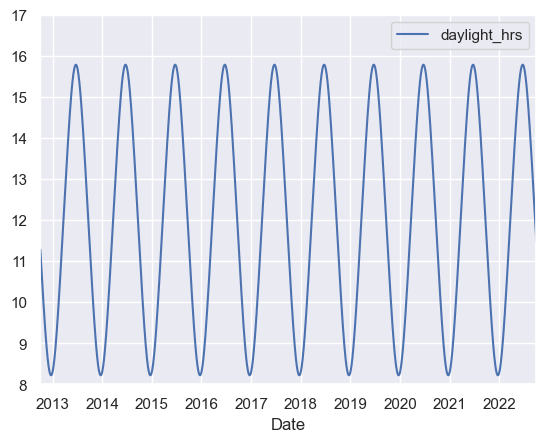

In [16]:

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [22]:
clima

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WT05,WT08,WT09,WT13,WT14,WT16,WT17,WT18,WT22,dry day
DATE,,,,,,,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.000000e+00,0.0,0.0,NaN,0.55,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,2.624021e-08,0.0,0.0,NaN,0.51,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,1.830712e-09,0.0,0.0,NaN,0.53,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,4.881900e-08,0.0,0.0,NaN,0.54,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,0
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,3.051187e-09,0.0,0.0,NaN,0.48,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",15.21,NaN,NaN,3.051187e-09,0.0,0.0,41.0,0.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2016-12-28,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.72,NaN,NaN,0.000000e+00,0.0,0.0,41.0,0.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2016-12-29,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",8.50,NaN,NaN,3.051187e-09,0.0,0.0,42.0,0.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [23]:
clima['TMIN'] /= 10
clima['TMAX'] /= 10
clima['Temp (C)'] = 0.5 * (clima['TMIN'] + clima['TMAX'])
clima['PRCP'] /= 254
clima['dry day'] = (clima['PRCP'] == 0).astype(int)

daily = daily.join(clima[['PRCP', 'Temp (C)', 'dry day']])

In [24]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [25]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,0.0560,1.0,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,0.0565,1.0,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,0.0595,1.0,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,0.0605,1.0,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,0.0605,1.0,0.010959


In [26]:
daily.isnull().sum()

Total              0
Mon                0
Tue                0
Wed                0
Thu                0
Fri                0
Sat                0
Sun                0
holiday            0
daylight_hrs       0
PRCP            2099
Temp (C)        2099
dry day         2099
annual             0
dtype: int64

In [27]:
sinvacios = daily.dropna(subset=['PRCP','Temp (C)','dry day'])

In [28]:
sinvacios

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000e+00,0.0560,1.0,0.000000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000e+00,0.0565,1.0,0.002740
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000e+00,0.0595,1.0,0.005479
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000e+00,0.0605,1.0,0.008219
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000e+00,0.0605,1.0,0.010959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,2210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.243449,1.201255e-11,0.0420,0.0,4.235616
2016-12-28,2944.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.252283,0.000000e+00,0.0425,1.0,4.238356
2016-12-29,2268.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.262456,1.201255e-11,0.0440,0.0,4.241096


In [30]:
sinvacios.isnull().sum()

Total           0
Mon             0
Tue             0
Wed             0
Thu             0
Fri             0
Sat             0
Sun             0
holiday         0
daylight_hrs    0
PRCP            0
Temp (C)        0
dry day         0
annual          0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

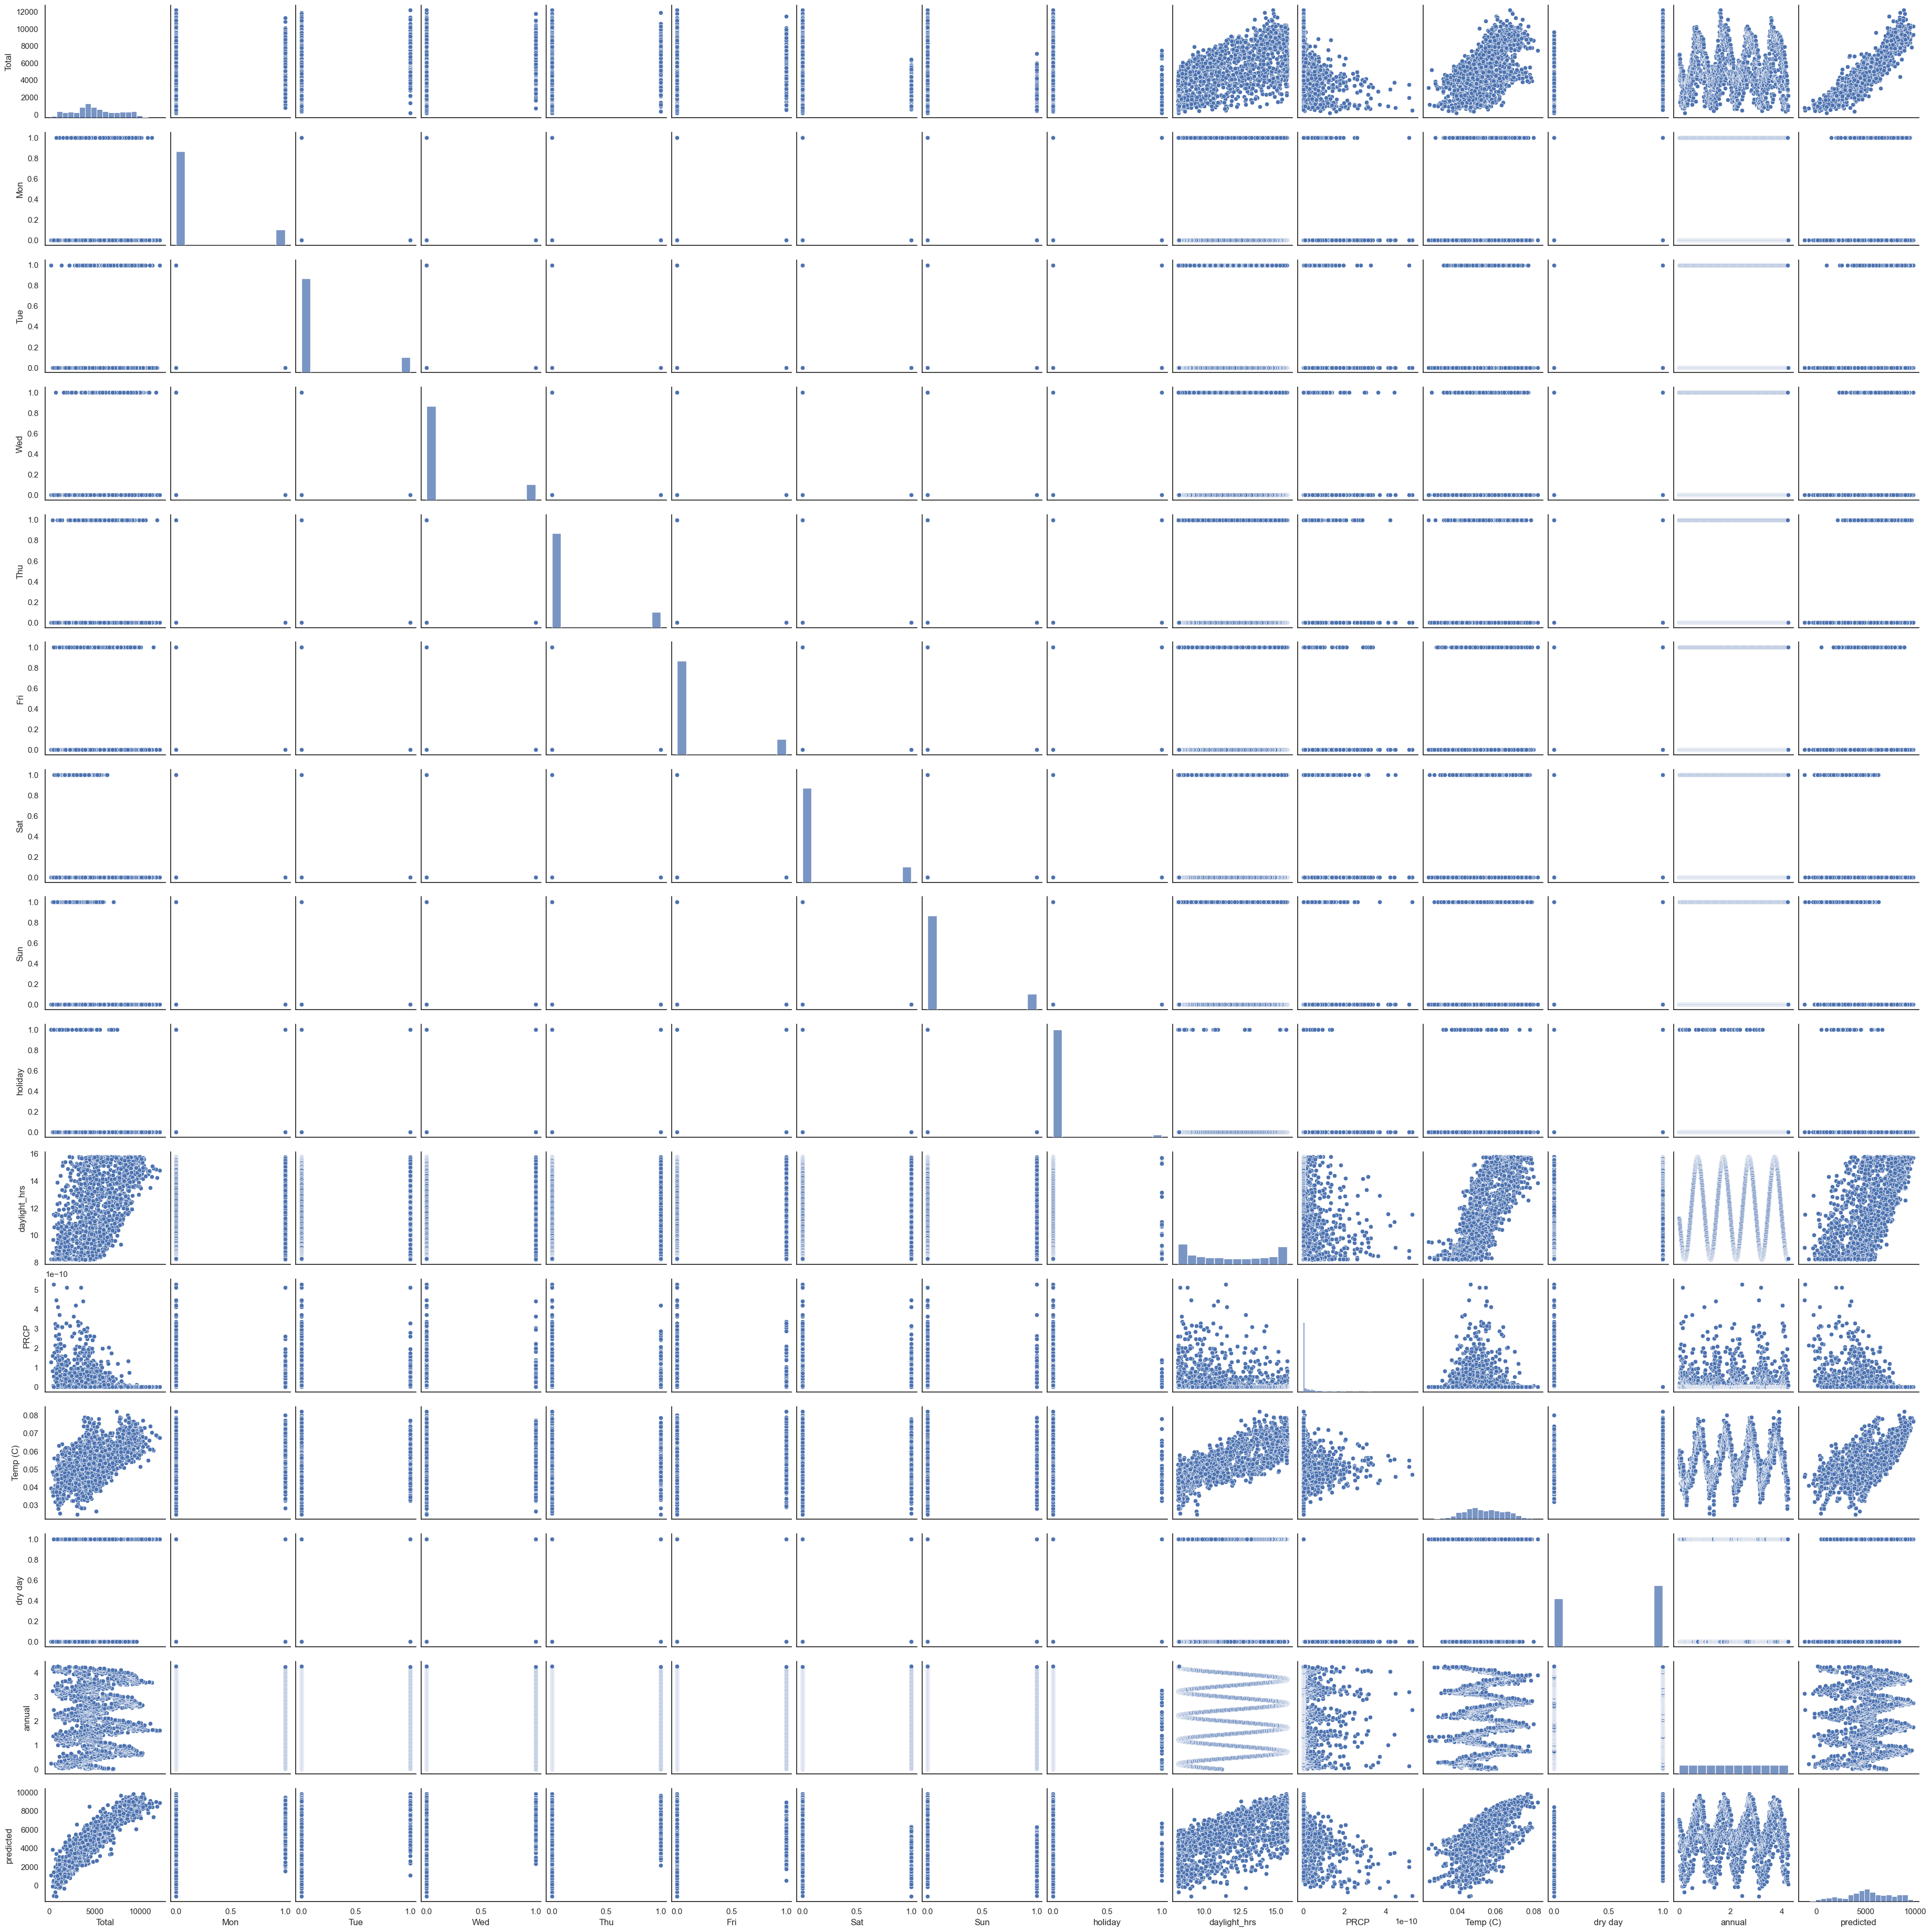

In [39]:
sns.set(style='white', context='notebook')
sns.pairplot(sinvacios, height=2.5)
plt.show

In [31]:
x = np.array(sinvacios[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday', 'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']])
y = np.array(sinvacios['Total'])

In [32]:
lm_fit = LinearRegression()

lm_fit.fit(x,y)

LinearRegression()

In [33]:
print(f" intercept:{lm_fit.intercept_}\n slope:{lm_fit.coef_}\n R2: {lm_fit.score(x,y)}")

 intercept:-950628686094346.2
 slope:[ 9.50628686e+14  9.50628686e+14  9.50628686e+14  9.50628686e+14
  9.50628686e+14  9.50628686e+14  9.50628686e+14 -2.29087500e+03
  2.32167969e+02 -5.54866554e+12  1.02842188e+03  7.81489517e+04
  4.77214122e+01]
 R2: 0.8628047218893269


In [34]:
def RSE(y_true,y_predicted):
    
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = math.sqrt(RSS / (len(y_true) - 2))
    return rse


In [35]:
yy = lm_fit.predict(x)

In [36]:
print(f"RSE: {RSE(y,yy)}")

RSE: 944.663429907046


In [37]:
sinvacios['predicted'] = lm_fit.predict(x)
sinvacios

C:\Users\RAUL GLEZ\AppData\Local\Temp\ipykernel_1332\1452013030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sinvacios['predicted'] = lm_fit.predict(x)


,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual,predicted
Date,,,,,,,,,,,,,,,
2012-10-03,7042.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.000000e+00,0.0560,1.0,0.000000,7049.000
2012-10-04,6950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.000000e+00,0.0565,1.0,0.002740,6772.875
2012-10-05,6296.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.000000e+00,0.0595,1.0,0.005479,6321.125
2012-10-06,4012.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.000000e+00,0.0605,1.0,0.008219,3767.875
2012-10-07,4284.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.000000e+00,0.0605,1.0,0.010959,3647.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,2210.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.243449,1.201255e-11,0.0420,0.0,4.235616,4374.375
2016-12-28,2944.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.252283,0.000000e+00,0.0425,1.0,4.238356,5493.875
2016-12-29,2268.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.262456,1.201255e-11,0.0440,0.0,4.241096,4216.625


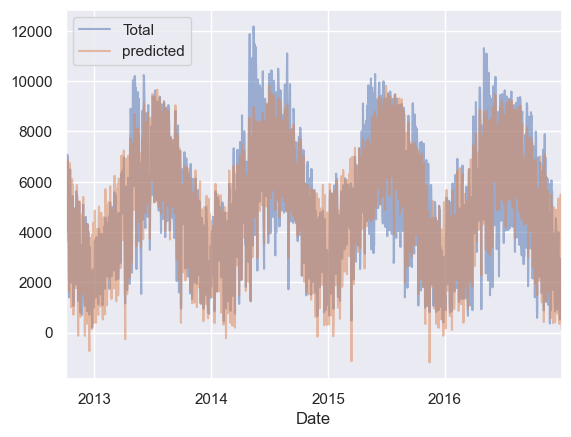

In [38]:
sinvacios[['Total', 'predicted']].plot(alpha=0.5);